# <span style="color:green"> **Assignment 1: Simple Linear Regression**</span>

## <span style="color:green"> **Modules & Packages**</span>

In [1]:
# Pandas: To manipulate DataFrames
import pandas as pd
# Seaborn & Matplotlib: To plot scatter plots
import seaborn as sns
import matplotlib.pyplot as plt
# Statsmodels: To estimate our regression model
import statsmodels.api as sm
# Numpy: For mathematical computations
import numpy as np

## <span style="color:green"> **The Dataset**</span>
Our final dataset will be the result of a concatenation between two columns that lie in two seperate sheets of an excel file. Below, we'll perform some manipulations to construct the desired dataset.

In [8]:
# Define a list containing the Excel sheet names
sheet_titles = ["US PMI", "China PMI"]

# Create an empty dictionary within which will be stored the original tables
datasets = {}

# Retrieve the tables from the Excel file and store them in the empty dictionary
for title in sheet_titles:
    dataset = pd.read_excel("PMI-Data.xlsx", sheet_name = title, skiprows = range(5), usecols = 'A:D', index_col = 0)[::-1]
    # Store the US and China tables in the "datasets" dictionary
    datasets[title] = dataset

# Rename columns of interest
datasets["US PMI"].rename(columns = {"% Change" : "uspchange"}, inplace = True)
datasets["China PMI"].rename(columns = {"% Change" : "chipchange"}, inplace = True)

In [9]:
# Reset the index column of each dataset (remove dates)
datasets["US PMI"].reset_index(inplace = True)
datasets["China PMI"].reset_index(inplace = True)

In [10]:
# Concetenate the "US_PMI % Change" and "China_PMI % Change" columns to create the final dataset
df = pd.concat([datasets["US PMI"]["uspchange"], datasets["China PMI"]["chipchange"]], axis = 1)

# Remove missing values
df.dropna(inplace = True)

# Divide values by 100
df["uspchange"] = df["uspchange"] / 100
df["chipchange"] = df["chipchange"] / 100

# Display final DataFrame
df

,uspchange,chipchange
1,0.001949,-0.008097
2,0.015564,0.024490
3,0.009579,-0.001992
4,-0.055028,0.000000
5,0.026104,-0.001996
...,...,...
72,-0.029772,-0.003976
73,0.012635,0.001996
74,-0.055258,-0.013944
75,-0.003774,-0.042424


## <span style="color:green"> **Summary Statistics & Visualization**</span>

In [11]:
# Use the describe() method to find the mean, standard deviation, maximum and minimum of each variable
df.describe()

,uspchange,chipchange
count,76.000000,76.000000
mean,0.001166,0.001860
std,0.040315,0.063457
min,-0.152749,-0.286000
25%,-0.020505,-0.007957
50%,0.000000,-0.001959
75%,0.018660,0.005868
max,0.204598,0.456583


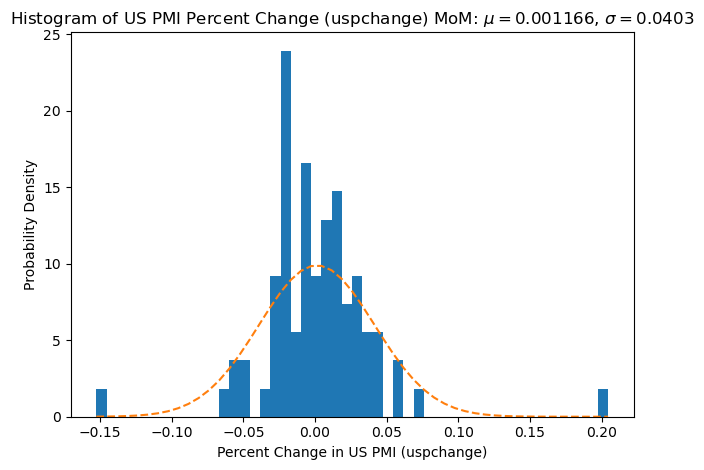

In [17]:
# Distribution of uspchange
mu = df.uspchange.mean()  # mean of distribution
sigma = df.uspchange.std()  # standard deviation of distribution

x = df.uspchange

num_bins = 50

fig, ax = plt.subplots()

# Histogram to visualize the variable's distribution
n, bins, patches = ax.hist(x, num_bins, density = 1)

# Add a 'best fit' line to the histogram
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

# Set axis labels and histogram title
ax.plot(bins, y, '--')
ax.set_xlabel('Percent Change in US PMI (uspchange)')
ax.set_ylabel('Probability Density')
ax.set_title(r'Histogram of US PMI Percent Change (uspchange) MoM: $\mu=%5.6f$, $\sigma=%5.4f$'%(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
fig.savefig("distribution_uspchange.png", bbox_inches = 'tight', dpi = 250)
plt.show()

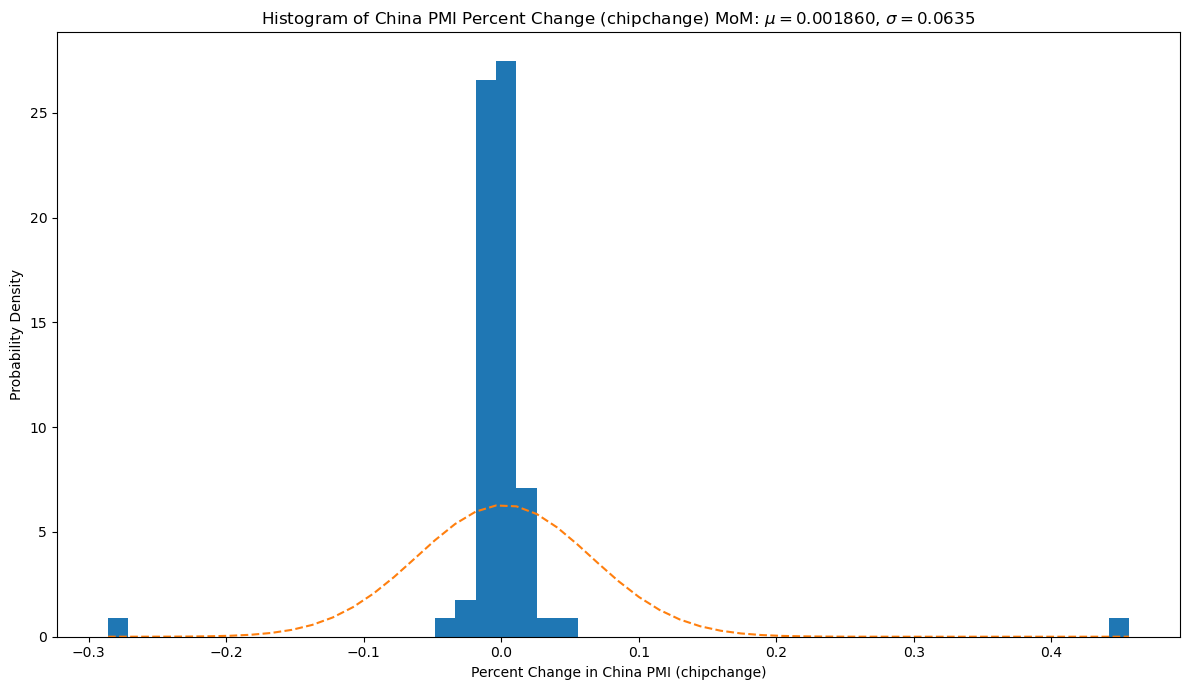

In [37]:
# Distribution of chipchange
mu = df.chipchange.mean()  # mean of distribution
sigma = df.chipchange.std()  # standard deviation of distribution

x = df.chipchange

num_bins = 50

fig, ax = plt.subplots()

# Histogram to visualize the variable's distribution
n, bins, patches = ax.hist(x, bins = num_bins, density = 1)

# Add a 'best fit' line to the hsitogram
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

# Set axis labels and histogram title
ax.plot(bins, y, '--')
ax.set_xlabel('Percent Change in China PMI (chipchange)')
ax.set_ylabel('Probability Density')
ax.set_title(r'Histogram of China PMI Percent Change (chipchange) MoM: $\mu=%5.6f$, $\sigma=%5.4f$'%(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
fig.savefig("distribution_chipchange.png", bbox_inches = 'tight', dpi = 250)
plt.show()

<AxesSubplot:title={'center':'Scatterplot: US PMI % Change vs. China PMI % Change'}, xlabel='chipchange', ylabel='uspchange'>

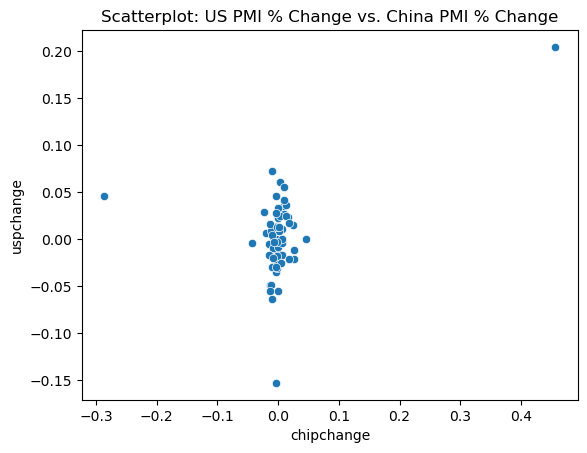

In [19]:
# Display a scatter plot to get a feel for the relationship between both variables
scatter_initial = sns.scatterplot(x = "chipchange", y = "uspchange", data = df)
scatter_initial.set(title = "Scatterplot: US PMI % Change vs. China PMI % Change")
scatter_initial

## <span style="color:green"> **Simple OLS Regression**</span>

In [27]:
# Define dependant (y) and independent (x) variables
x = df["chipchange"]
y = df["uspchange"]

# Add a constant to the predictor variable (intercept)
x = sm.add_constant(x)

# Fit the OLS model to the sample data
model_ols = sm.OLS(y, x).fit()

# View model summary (intercept, coefficient, r-squared)
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              uspchange   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     18.67
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           4.77e-05
Time:                        14:06:55   Log-Likelihood:                 145.25
No. Observations:                  76   AIC:                            -286.5
Df Residuals:                      74   BIC:                            -281.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.004      0.153      0.8

> **Estimated model**: ``uspchange = 0.0006 + 0.2852 * chipchange``

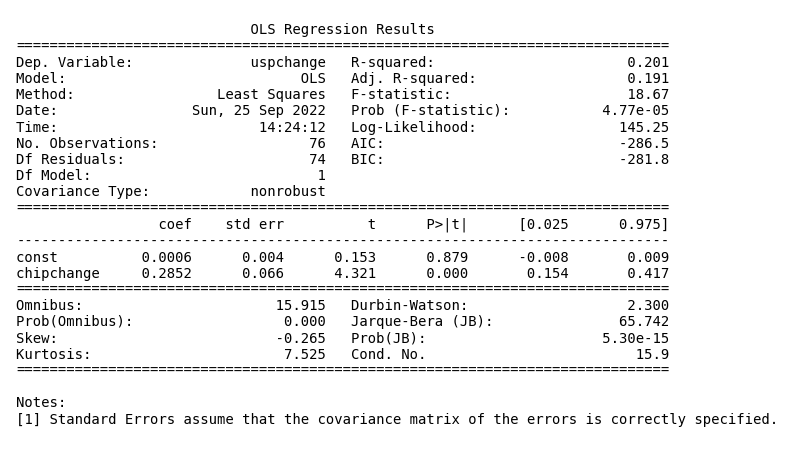

In [59]:
# Save statsmodels output as an image
plt.rc('figure', figsize=(8, 5))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model_ols.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('images/output.png')

In [53]:
# Save estimated parameters in variables
intercept = model_ols.params[0]
slope = model_ols.params[1]

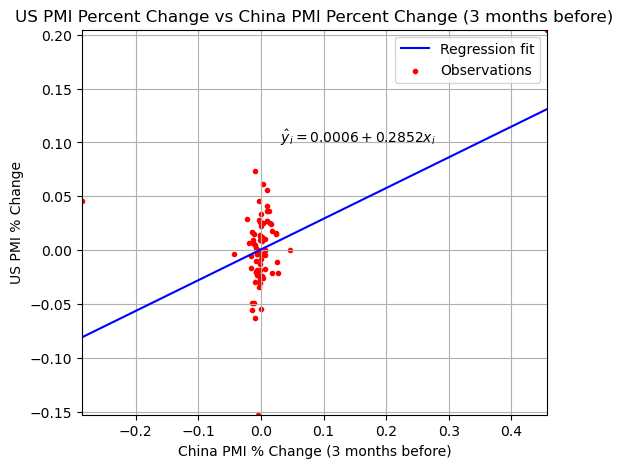

In [54]:
# Plot the estimated regression line over the original scatterplot
X_reg = np.linspace(df['chipchange'].min(), df['chipchange'].max())

y_reg = intercept + X_reg * slope

fig, ax = plt.subplots()

plt.grid(True)

plt.plot(X_reg, y_reg, 'b-', label = "Regression fit")

plt.scatter(df.chipchange, df.uspchange, c = "red", marker = '.', label = "Observations")


plt.xlim(df['chipchange'].min(), df['chipchange'].max())
plt.ylim(df['uspchange'].min(), df['uspchange'].max())
plt.legend()

ax.set_ylabel('US PMI % Change')
ax.set_xlabel("China PMI % Change (3 months before)")
ax.set_title("US PMI Percent Change vs China PMI Percent Change (3 months before)")
ax.annotate(r'$\hat y_i = %5.4f + %5.4f x_{i}$ '%(intercept, slope), xy = (0.03, 0.1))

plt.savefig("Regression_fit.png")

plt.show()